In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
# Now to load the bank churner data
data = pd.read_excel('C:/Users/user/Downloads/P12-Churn-Modelling.xlsx')

In [3]:
# make a copy of the data that will be analysed in case something goes wrong
df = data.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


based on the above information, this data has 10000 rows and 13 columns. There is no missing data

In [6]:
# Remove duplicate values
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There were no duplicate values on the data

In [8]:
# Change a few column types into objects
df[['Exited','HasCrCard','CustomerId','RowNumber','NumOfProducts','IsActiveMember']] = df[['Exited','HasCrCard','CustomerId','RowNumber','NumOfProducts','IsActiveMember']].astype(str)

Write a function that will replace outliers with the median

In [9]:
def outlier_remover(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [10]:
df1 = outlier_remover(df) 

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  object 
 1   CustomerId       10000 non-null  object 
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB


In [12]:
df1.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.964800,37.763300,5.012800,76485.889288,100090.239881
std,96.000151,8.644903,2.892174,62397.405202,57510.492818
min,383.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,43.000000,7.000000,127644.240000,149388.247500
max,850.000000,62.000000,10.000000,250898.090000,199992.480000


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  object 
 1   CustomerId       10000 non-null  object 
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB


In [14]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

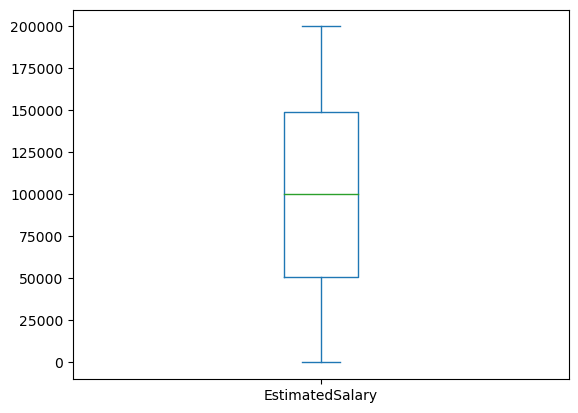

In [15]:
df1['EstimatedSalary'].plot(kind='box')

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

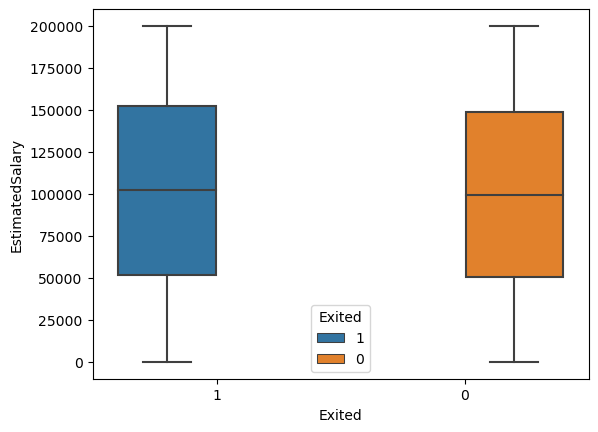

In [16]:
sns.boxplot(x='Exited',y='EstimatedSalary',hue='Exited',data=df1)

People earning a higher salary are more likely to leave the bank

<AxesSubplot:xlabel='Exited', ylabel='count'>

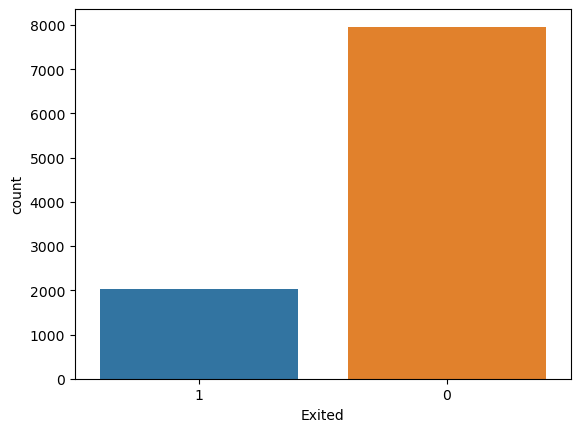

In [17]:
sns.countplot(x='Exited',data=df1)

The majority of the customers did not leave the bank.

<AxesSubplot:xlabel='Age', ylabel='Tenure'>

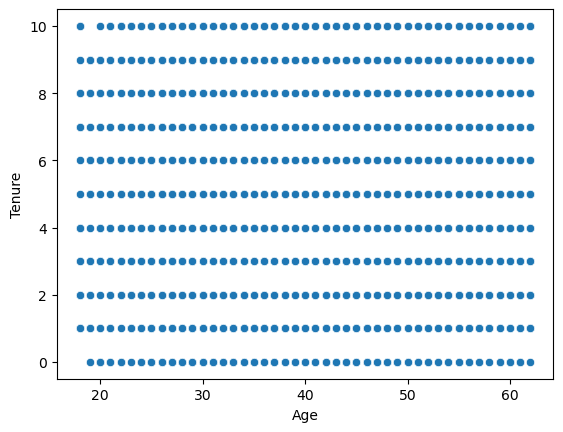

In [18]:
sns.scatterplot(x='Age',y='Tenure',data=df1)

<AxesSubplot:>

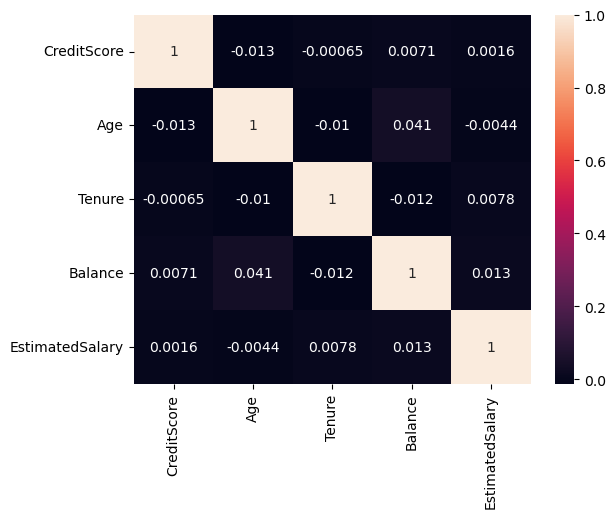

In [19]:
sns.heatmap(df1.corr(),data=df1,annot=True)

There is very little to no correlation between the continous variables

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

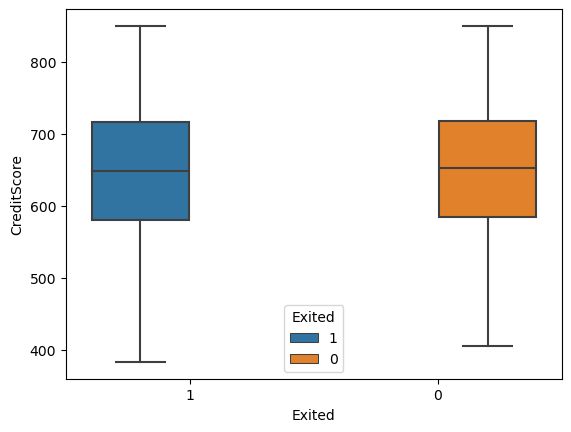

In [20]:
sns.boxplot(x='Exited',y='CreditScore',hue='Exited',data=df1)

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

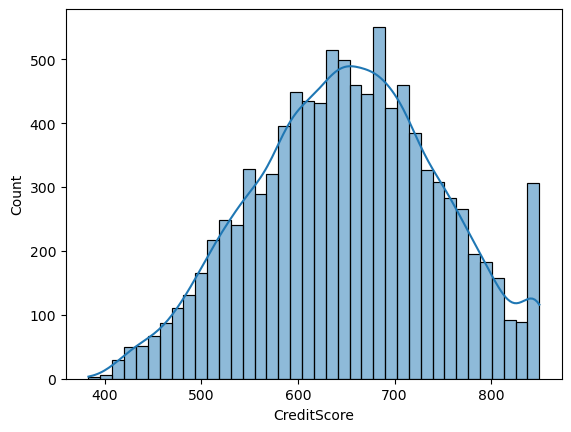

In [21]:
sns.histplot(x='CreditScore',data=df1,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

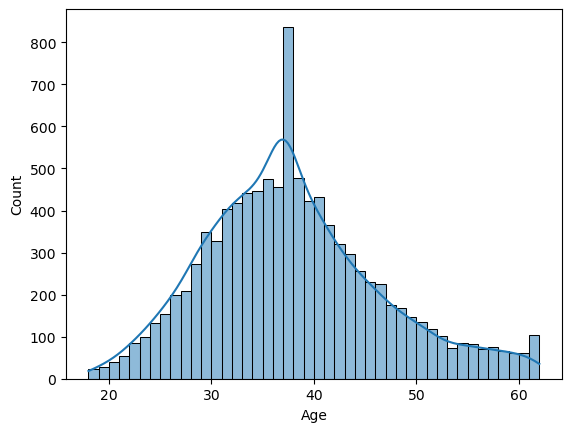

In [22]:
sns.histplot(x='Age',data=df1,kde=True)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

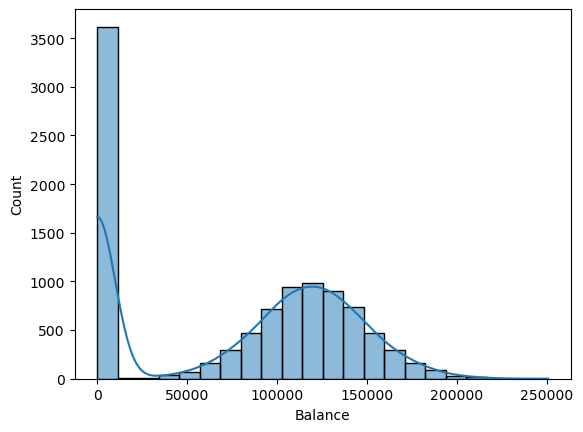

In [23]:
sns.histplot(x='Balance',data=df1,kde=True)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

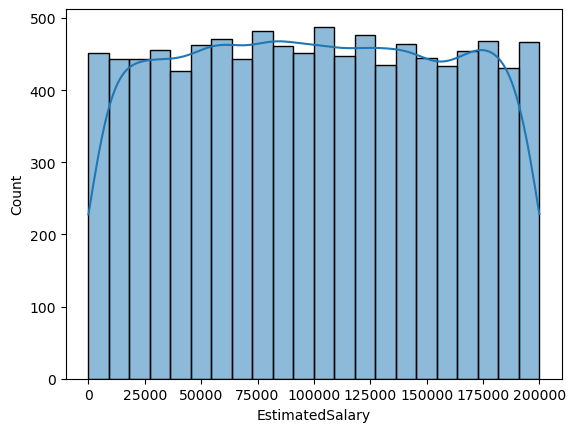

In [24]:
sns.histplot(x='EstimatedSalary',data=df1,kde=True)

In [ ]:
sns.histplot(x='Tenure',data=df1,kde=True)

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

In [ ]:
sns.boxplot(x='Exited',y='Balance',hue='Exited',data=df1)

In [ ]:
sns.boxplot(x='Exited',y='Tenure',hue='Exited',data=df1)

In [ ]:
sns.countplot(x='HasCrCard',data=df1,hue='Exited')

The plot above shows that customers that are credit card holders are likely to leave the bank

In [ ]:
sns.countplot(x='Exited',data=df1,hue='NumOfProducts')

In [ ]:
sns.countplot(x='Exited',data=df1,hue='IsActiveMember')

The number of non-active members who left the bank is greater than those who were active members.

In [ ]:
sns.countplot(x='Exited',data=df1,hue='Geography')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
categorical_features=[x for x in df.columns if df[x].dtype =="object"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df[categorical_features].columns:
    df1[i] = le.fit_transform(df[i])

In [ ]:
X = df1[['HasCrCard','CreditScore','IsActiveMember','NumOfProducts','Age','Tenure','Balance','EstimatedSalary']]
y = df1['Exited'].astype('int64')

In [ ]:
categorical_features

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority')

# Fit the model to generate the data.
X_smote, y_smote = sm.fit_resample(X, y)

In [ ]:
SD = MinMaxScaler()

In [ ]:
X = SD.fit_transform(X)

In [ ]:
log = LogisticRegression(solver='liblinear',C=0.1)
Decision = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()
forest = RandomForestClassifier(criterion='entropy', max_depth=18, max_features=5,min_samples_split=100, n_estimators=1000)
xboost = XGBClassifier(n_estimators=10)

In [ ]:
model = {'Logistic Regression model':log,'Decision Tree model':Decision,'KN Neighbors model':knn,
          'Support Vector Machine model':svc,'Random Forest model':forest,'XGBoost':xboost}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.20, random_state=101)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [43]:

for i in model:
    model[i].fit(X_train,y_train)
    predict = model[i].predict(X_test)
    accuracy= accuracy_score(y_test, predict)
    clf_report= classification_report(y_test, predict) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {i} is {accuracy:.2f}")
    print(clf_report)
    print("\n")
    

The accuracy of model Support Vector Machine model is 0.58
              precision    recall  f1-score   support

           0       0.62      0.39      0.48      1585
           1       0.56      0.77      0.65      1601

    accuracy                           0.58      3186
   macro avg       0.59      0.58      0.56      3186
weighted avg       0.59      0.58      0.56      3186



The accuracy of model Random Forest model is 0.84
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1585
           1       0.86      0.82      0.84      1601

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



The accuracy of model XGBoost is 0.83
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1585
           1       0.84      0.82      0.83      1601

    accuracy                   

In [44]:
X_smote.head()

,HasCrCard,CreditScore,IsActiveMember,NumOfProducts,Age,Tenure,Balance,EstimatedSalary
0,1,619.0,1,0,42.0,2,0.00,101348.88
1,0,608.0,1,0,41.0,1,83807.86,112542.58
2,1,502.0,0,2,42.0,8,159660.80,113931.57
3,0,699.0,0,1,39.0,1,0.00,93826.63
4,1,850.0,1,0,43.0,2,125510.82,79084.10


In [45]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

In [46]:
#nn_model = Sequential()
#nn_model.add(Dense(50,activation='relu'))
#nn_model.add(Dense(35,activation='relu'))
#nn_model.add(Dense(20,activation='relu'))
#nn_model.add(Dense(15,activation='sigmoid'))

#nn_model.add(Dense(1))

In [47]:
#nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
#nn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

In [49]:
#losses = pd.DataFrame(nn_model.history.history)
#losses

In [50]:
#losses.plot()

In [51]:
#predictions = nn_model.predict(X_test)

In [52]:
#train_loss, train_acc = nn_model.evaluate(X_train, y_train, verbose=0)
#train_acc

In [53]:
#test_loss , test_acc = nn_model.evaluate(X_test, y_test, verbose=0)
#test_acc

In [54]:
#nn_model.save('bank_churner_neural_network_model')

In [55]:
'''
error_rate = []
for i in range(1,60):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    '''

'\nerror_rate = []\nfor i in range(1,60):\n    KNN = KNeighborsClassifier(n_neighbors=i)\n    KNN.fit(X_train,y_train)\n    pred_i = KNN.predict(X_test)\n    error_rate.append(np.mean(pred_i != y_test))\n    '

In [56]:
'''
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',ls = '--',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('error_rate vs K values')
plt.xlabel('K')
plt.ylabel('error_rate')
'''

"\nplt.figure(figsize=(10,6))\nplt.plot(range(1,60),error_rate,color='blue',ls = '--',marker='o',\n        markerfacecolor='red',markersize=10)\nplt.title('error_rate vs K values')\nplt.xlabel('K')\nplt.ylabel('error_rate')\n"

In [57]:
from sklearn.model_selection import GridSearchCV


In [58]:
''''
#from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

SyntaxError: EOF while scanning triple-quoted string literal (1042874335.py, line 6)

In [ ]:
#grid.best_estimator_

In [ ]:
#print(classification_report(y_test,grid.predict(X_test)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
'''
forest_params = [{'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=10)],'max_depth': list(range(10, 50)), 'max_features': list(range(0,14)),
"min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] }]
cv_rf = StratifiedKFold(n_splits=5)

clf = RandomizedSearchCV(RandomForestClassifier(), forest_params, cv = cv_rf, scoring='f1_macro')

clf.fit(X_train, y_train)
'''

In [ ]:
#clf.best_estimator_

In [ ]:
#print(clf.best_score_)

In [ ]:
'''
log_params = [{'solver':['liblinear', 'newton-cg', 'sag', 'saga','lbfgs']}, {'C':[0.001, 0.01, 0.1, 1, 10, 100]},{'penalty' : ['l1', 'l2']}]
cv_log= StratifiedKFold(n_splits=5)
lg = GridSearchCV(LogisticRegression(), log_params, cv = cv_log, scoring='precision')

lg.fit(X_train, y_train)
'''

In [ ]:
lg.best_estimator_

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[1,10,100,150,200,250,300,350,400,450,500]}
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)
grid.fit(X_train,y_train)
'''

In [ ]:
#grid.best_estimator_

In [ ]:
''' 
param_grid = {'n_neighbors':[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,100]}
grid2 = GridSearchCV(KNeighborsClassifier(),param_grid,verbose=3)
grid2.fit(X_train,y_train)
'''

In [ ]:
#grid2.best_estimator_